### PyTorch Workflow
+ Exploring an example PyTorch worfklow

In [29]:
what_to_cover = {
    1: 'data (prepare and load)',
    2: 'build model',
    3: 'fitting the model to data (training)',
    4: 'making predictions and evaluating a model (inference)',
    5: 'saving and loading a model',
    6: 'putting it all together'
}
what_to_cover

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [30]:
import torch
from torch import nn ## nn contains all of PyTorch building blocks for building neural nets
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.2.2'

### Data (Preparing and loading)
Data can be almost anything in ML...
+ excel spreadsheet; Images of any kind; Videos, audio, text

+ Machine learning is a game of two parts:
1. Get data into numerical encoding in the form of tensors to represent inputs
2. Build a model to learn patterns in that numerical data

In [31]:
## Create *known* paramaterse
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [32]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

+ Create a training and test set with data
+ Two main algorithms, Gradient Descent and Backpropogation

In [33]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [34]:
#X_train, y_train

In [35]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                    test_data=X_test, test_labels=y_test, predictions=None):
    """Plots training data, test data and compares predictions"""
    plt.figure(figsize=(12,8))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training Data')
    
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing Data')

    # Are there predciitons?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions,c='r',s=4,label='Predictions')

    # show the legend
    plt.legend(prop={'size': 14})

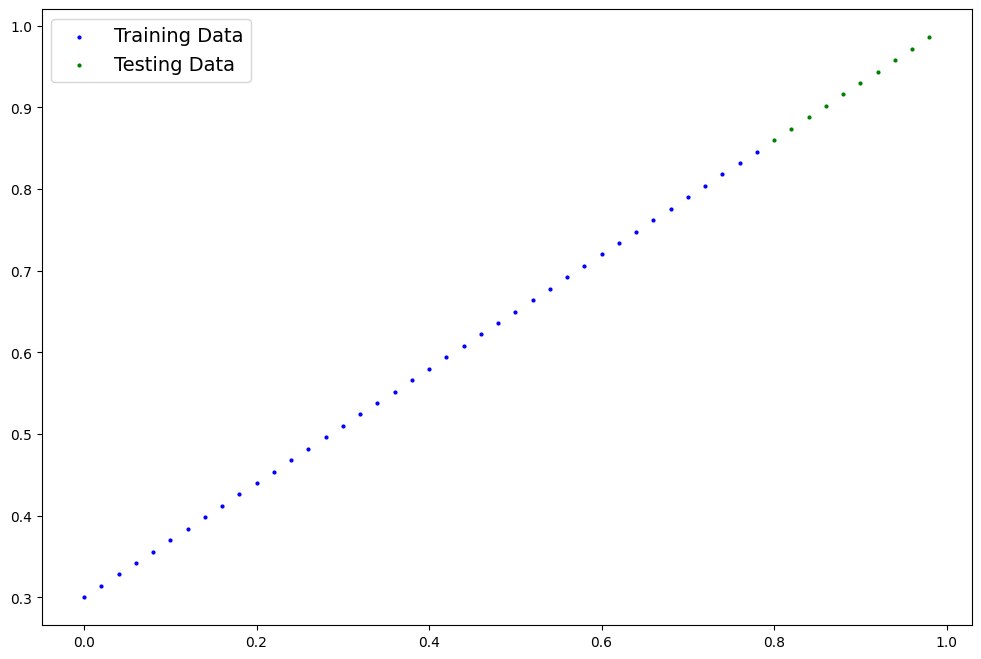

In [36]:
plot_predictions()

### Creating Regression Model with PyTorch

In [37]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
        
        

### PyTorch model building essentials

+ torch.nn - contains all of the building blocks for computational graphs (ex: nn)
+ torch.nn.Parameter - parameters the modle should try and learn
+ torch.nn.Module - base class for all nn modules
+ torch.optim - this is where the optimizers are - to help with gradient descent
+ def forward() - All nn.Module subclasses reuqir to overwrite forward()

### Checking the contents of PyTorch Model

+ now that have created a model let's see what is inside

In [85]:
# create a random seed
torch.manual_seed(23)

# create an instance of the model
model_0 = LinearRegressionModel()

# check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([-0.8733], requires_grad=True),
 Parameter containing:
 tensor([0.4376], requires_grad=True)]

In [86]:
# list the named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-0.8733])), ('bias', tensor([0.4376]))])

In [87]:
weight, bias

(0.7, 0.3)

### Making predictions with `torch.inference_mode()`
+ let's see how well the model predicts y_test based on x_test
+ passed through data to run through forward method

In [88]:
# make predcitions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[-0.2610],
        [-0.2785],
        [-0.2959],
        [-0.3134],
        [-0.3309],
        [-0.3483],
        [-0.3658],
        [-0.3833],
        [-0.4007],
        [-0.4182]])

In [89]:
y_test, y_preds

(tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]),
 tensor([[-0.2610],
         [-0.2785],
         [-0.2959],
         [-0.3134],
         [-0.3309],
         [-0.3483],
         [-0.3658],
         [-0.3833],
         [-0.4007],
         [-0.4182]]))

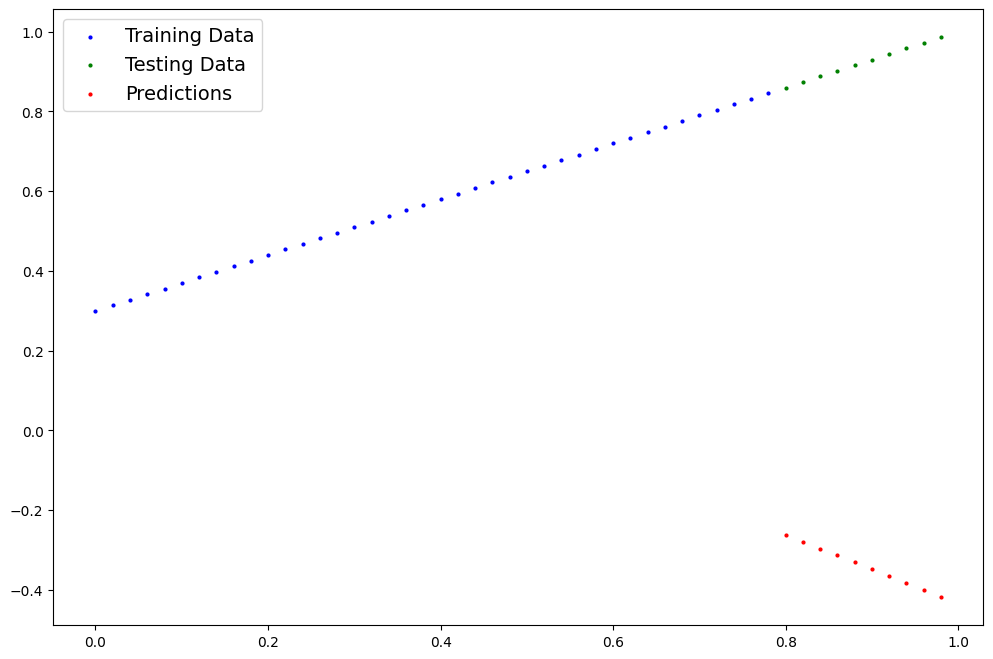

In [90]:
plot_predictions(predictions=y_preds)

### Train Model
+ the whole idea is to move from some **unknown** parameters to some known parameters, or poor representation to better representation of data
+ Need to figure out `loss functions` as a way to guide the model
+ Note: Loss function may also be called cost fucntion or citerion
+ **Loss function**: lower is better; a fucnction to measure how your model performs vs the ideal outputs
+ **Optimizer** takes into account the loss of a model and adjusts parameters (e.g. weight & bias to improve loss function)

+ And specifically for PyTorch, we need:
    + training loop
    + testing loop

In [91]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.8733], requires_grad=True),
 Parameter containing:
 tensor([0.4376], requires_grad=True)]

In [92]:
# check out model parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-0.8733])), ('bias', tensor([0.4376]))])

### Setting up a loss function + optimizer

In [93]:
# setup a loss fucntion
loss_fn = nn.L1Loss()

# setup an optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)


### PyTorch Training Loops
+ building a training loop (and a testing loop) in PyTorch
+ A couple of things to need in a training loop:
0. Loop through the data
1. Forward pass (data moves through model forward functions) - also called forward propagation
2. Calculate the loss - compare forward pass predictions
3. Optimizer zero grad
4. Loss backward - moves backwards through the network to calculate gradients
5. Optimizer step - adjust model parameter to try and improve the loss (**gradient descent**)

In [116]:
# an epoch is one loop through the data...(this is a hyper-parameter)
epochs=1000

# track experiments/differnet values

epoch_count = []
loss_values = []
test_loss_values = []


#### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters to require gradients as needed

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. calculate loss function - difference between training and ideal values
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on loss w/r to parameters of model
    loss.backward()

    # 5. step the optimizer (perform gradient descent)
    optimizer.step()

    # Testing
    model_0.eval() # turns off different settings in the model not needed
    with torch.inference_mode():# turns off gradient tracking
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calcualte loss
        test_loss = loss_fn(test_pred, y_test)
    # print out what is happening

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")        

        
        # Print out modle state_dict()
        print(model_0.state_dict())
    

Loss: 0.00044472143054008484
Epoch: 0 | Loss: 0.00044472143054008484 | Test loss: 0.0011230409145355225
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.2996]))])
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Epoch: 10 | Loss: 0.00044472143054008484 | Test loss: 0.0011230409145355225
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.2996]))])
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Loss: 0.0007073677843436599
Loss: 0.00044472143054008484
Epoch: 20 | Loss: 0.00044472143054008484 | Test loss: 0.0011230409145355225
OrderedDict([('weights', ten

In [117]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6996])), ('bias', tensor([0.3006]))])

In [118]:
weight, bias

(0.7, 0.3)

In [119]:
#epoch_count, loss_values, test_loss_values
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00044472, 0.00044472,
        0.00044472, 0.00044472, 0.00044472, 0.00

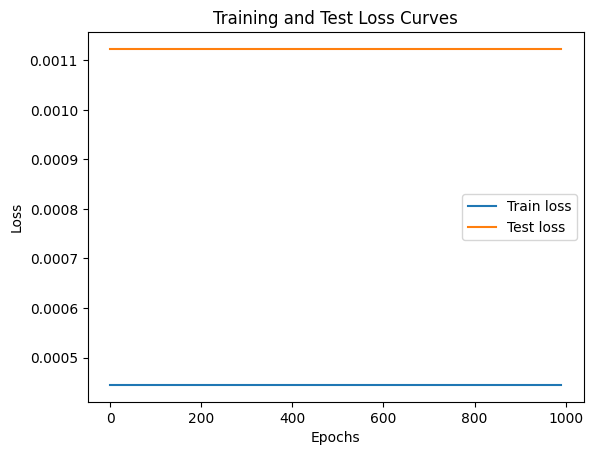

In [120]:
## Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and Test Loss Curves')
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend()

In [121]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

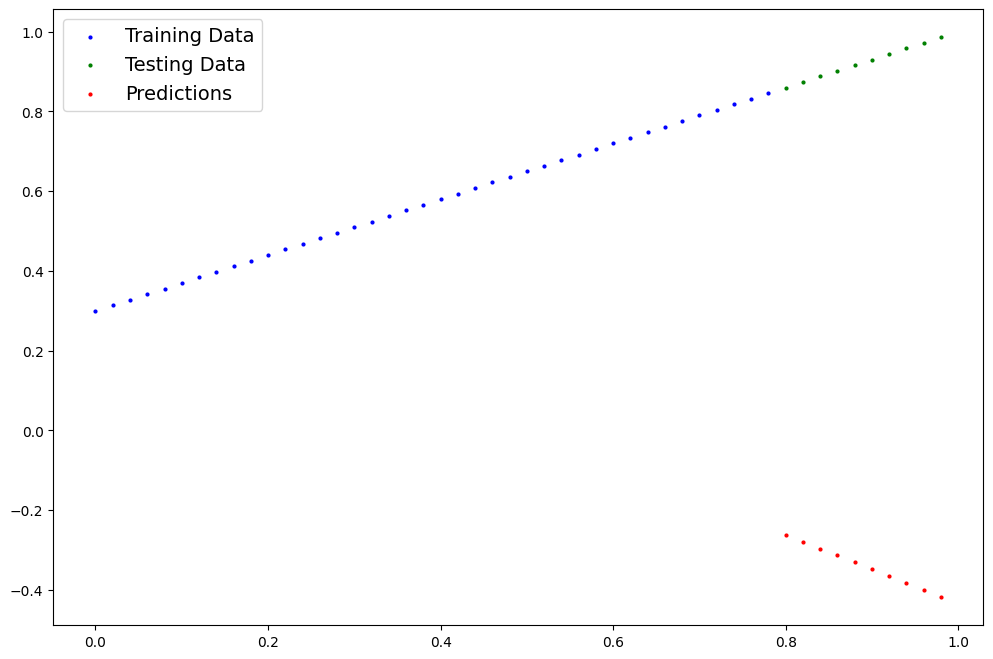

In [122]:
plot_predictions(predictions=y_preds)

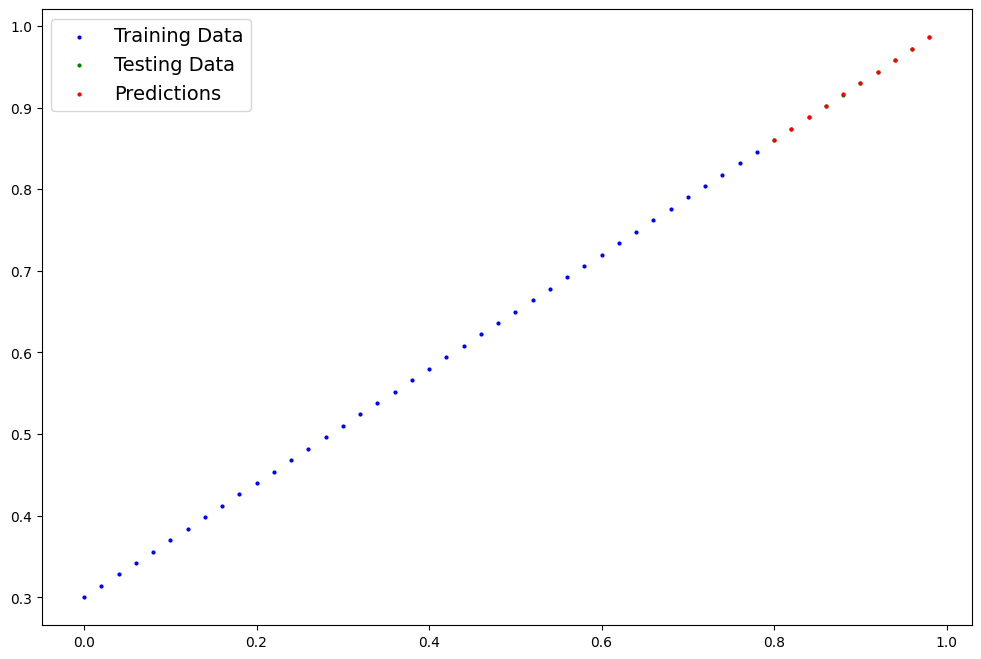

In [123]:
plot_predictions(predictions=y_preds_new)

### Saving a model in PyTorch

+ There are 3 main methods for saving and loading models in Pytorch:
+ 1. `torch.save()` - allows to save a PyTorch object in pickle format
  2. `torch.load()` - allows to load a saved PyTorch object
  3. `torch.nn.Module.load_state_dict()` - allows to laod a model's saved state dictionary

In [124]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6996])), ('bias', tensor([0.3006]))])

In [126]:
# saving pyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_worfklow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_worfklow_model_0.pth


In [128]:
!ls -l models

total 8
-rw-r--r--  1 brendan  staff  1680 Jul  2 14:55 01_pytorch_worfklow_model_0.pth


### writing code to Load a model

In [131]:
# to laod in to have to instatiate a new mdole of lienar regression class
loaded_model_0 = LinearRegressionModel()

# load the saved state dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [132]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6996])), ('bias', tensor([0.3006]))])

In [133]:
# make dome prediitions with laoded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8603],
        [0.8743],
        [0.8882],
        [0.9022],
        [0.9162],
        [0.9302],
        [0.9442],
        [0.9582],
        [0.9722],
        [0.9862]])

In [136]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

In [137]:
# comapre loaded modle preds with origianl model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all Together